<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#18-9.-프로젝트-:-다양한-OCR모델-비교하기" data-toc-modified-id="18-9.-프로젝트-:-다양한-OCR모델-비교하기-1">18-9. 프로젝트 : 다양한 OCR모델 비교하기</a></span><ul class="toc-item"><li><span><a href="#Step1.-검증용-데이터셋-준비" data-toc-modified-id="Step1.-검증용-데이터셋-준비-1.1">Step1. 검증용 데이터셋 준비</a></span></li><li><span><a href="#Step2.-Google-OCR-API,-keras-ocr,-Tesseract로-테스트-진행" data-toc-modified-id="Step2.-Google-OCR-API,-keras-ocr,-Tesseract로-테스트-진행-1.2">Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행</a></span><ul class="toc-item"><li><span><a href="#Google-OCR-API" data-toc-modified-id="Google-OCR-API-1.2.1">Google OCR API</a></span></li><li><span><a href="#keras-ocr" data-toc-modified-id="keras-ocr-1.2.2">keras-ocr</a></span></li><li><span><a href="#Tesseract" data-toc-modified-id="Tesseract-1.2.3">Tesseract</a></span></li></ul></li><li><span><a href="#Step3.-테스트-결과-정리" data-toc-modified-id="Step3.-테스트-결과-정리-1.3">Step3. 테스트 결과 정리</a></span></li><li><span><a href="#Step4.-결과-분석과-결론-제시" data-toc-modified-id="Step4.-결과-분석과-결론-제시-1.4">Step4. 결과 분석과 결론 제시</a></span></li><li><span><a href="#루브릭" data-toc-modified-id="루브릭-1.5">루브릭</a></span></li><li><span><a href="#Postscript" data-toc-modified-id="Postscript-1.6">Postscript</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-1.7">Reference</a></span></li></ul></li></ul></div>

# 18-9. 프로젝트 : 다양한 OCR모델 비교하기

우리는 지금까지 Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능을 간단히 활용하여 보았습니다.

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다. 용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다. 그래서 오늘 다뤄본 위 3가지를 검증해 보는 프로젝트를 진행하겠습니다. 여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어, 어떤 모듈을 도입하면 좋을지 기술검증을 하는 역할을 맡게 되었다고 가정합니다.

## Step1. 검증용 데이터셋 준비
---
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
---
위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

### Google OCR API

In [2]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
path = os.getenv('HOME')+'/aiffel/ocr_python/test_01.jpeg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #321078597474 by visiting https://console.developers.google.com/billing/enable?project=321078597474 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry.

### keras-ocr

In [10]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/mochafreddo/.keras-ocr/craft_mlt_25k.h5
Looking for /home/mochafreddo/.keras-ocr/crnn_kurapan.h5


In [11]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다.
image_urls = [
    'https://pds.joins.com/news/component/newsis/201310/14/NISI20131013_0008809742_web.jpg',
    'http://pds.dailypharm.com/news_image/201908/255854_1.jpg'
]

images = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/home/mochafreddo/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


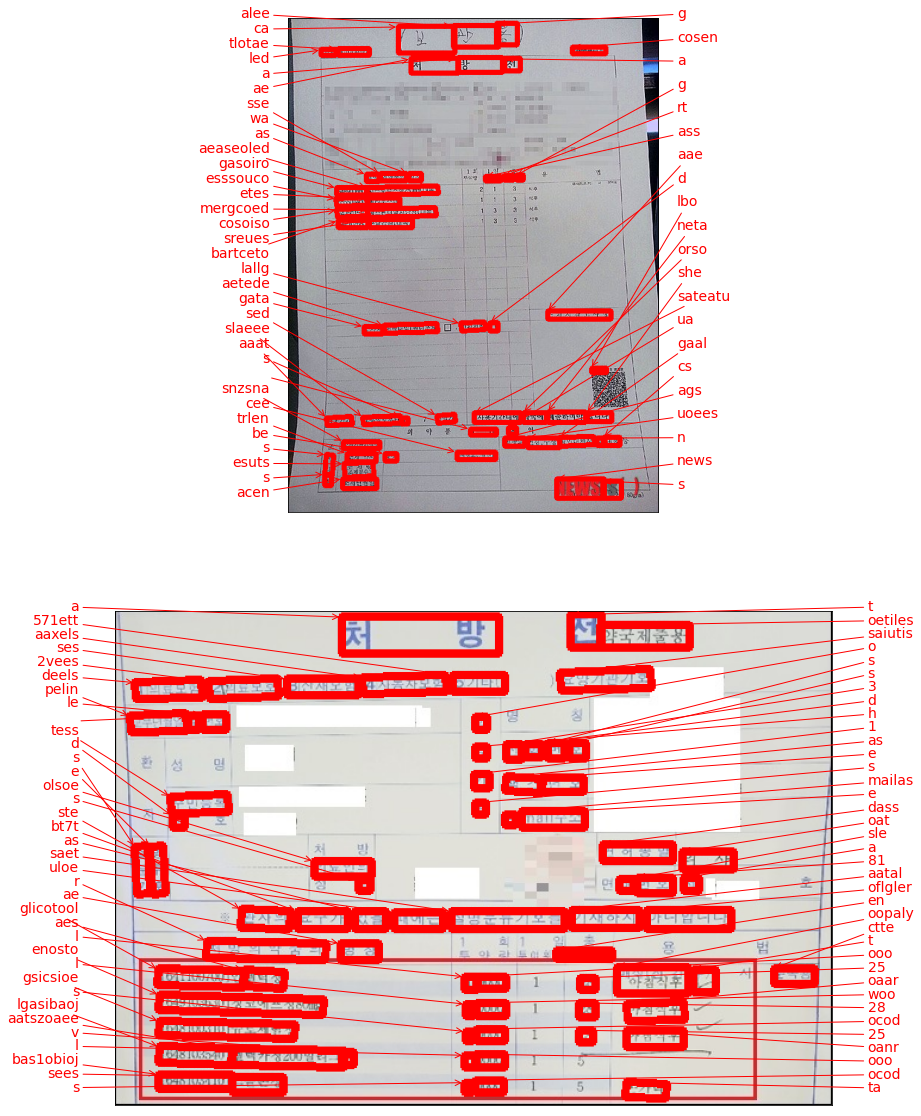

In [12]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### Tesseract

In [15]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_01.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/mochafreddo/aiffel/ocr_python/0000.png
/home/mochafreddo/aiffel/ocr_python/0001.png
/home/mochafreddo/aiffel/ocr_python/0002.png
/home/mochafreddo/aiffel/ocr_python/0003.png
/home/mochafreddo/aiffel/ocr_python/0004.png
/home/mochafreddo/aiffel/ocr_python/0005.png
/home/mochafreddo/aiffel/ocr_python/0006.png
/home/mochafreddo/aiffel/ocr_python/0007.png
/home/mochafreddo/aiffel/ocr_python/0008.png
/home/mochafreddo/aiffel/ocr_python/0009.png
/home/mochafreddo/aiffel/ocr_python/0010.png
/home/mochafreddo/aiffel/ocr_python/0011.png
/home/mochafreddo/aiffel/ocr_python/0012.png
/home/mochafreddo/aiffel/ocr_python/0013.png
/home/mochafreddo/aiffel/ocr_python/0014.png
/home/mochafreddo/aiffel/ocr_python/0015.png
/home/mochafreddo/aiffel/ocr_python/0016.png
/home/mochafreddo/aiffel/ocr_python/0017.png
/home/mochafreddo/aiffel/ocr_python/0018.png
/home/mochafreddo/aiffel/ocr_python/0019.png
/home/mochafreddo/aiffel/ocr_python/0020.png
/home/mochafreddo/aiffel/ocr_python/0021.png
/home/moch

In [16]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

저

만

의

가

품<ㄴ

이

명칭

[을

(꺼

|

1643505990ㅣ|닌정

]틴증

정

:급

(서

|

1657201050]환인염산이미프라민정25

]환0

}인음

!염&

산0

『010

|미프

프리

라민!

민정

1

25

람

[을

(서

|

]|645000160]리보트

리

크5

들

| 성

정

1 (

92

| 급

(서

|

1657200470]|알

노

망

람

6 들

-

[2

든

「

10$

회

= ()

「

:앨

닐| 은

|


(0) >

(0) ^

라

1 놓

일

두 (,

6 여

1 수


ㄷㄷ

약을

일수

1()

|

1()

]

[0

]

1(0)


Done


## Step3. 테스트 결과 정리
---
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

## Step4. 결과 분석과 결론 제시
---
- 우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
- 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.
- 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

## 루브릭
---
아래의 기준을 바탕으로 프로젝트를 평가합니다.

|평가문항|상세기준|
|:---|:---|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

## Postscript
---

## Reference
---